In [91]:
from dotenv import load_dotenv
import os

load_dotenv()  # load variables from .env file
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

# Load tables & images

In [92]:
import pandas as pd
from pathlib import Path

DATA_PATH = '../competitors-xgb/data'
file_path = (
    Path(DATA_PATH) / 'tables_OZ_geo_5500' /
    'processed' / 'OZ_geo_5500.csv'
)
full_df = pd.read_csv(file_path) 
full_df.shape

(5562, 6)

In [93]:
import pandas as pd
from pathlib import Path

DATA_PATH = '../competitors-xgb/data'
IMAGES_DIR = (
    Path(DATA_PATH) / 'images_OZ_geo_5500'
)

In [94]:
pd.set_option('display.max_colwidth', None)
sample = full_df.sample(1)
display(sample[['sku']])
display(sample[['name']])
display(sample[['description']])

sku
4958  542331146

name
4958  настенная карта Крыма 75 х 121 см (на баннере)

description
4958  Новая карта республики Крым, размером 75 х 121 см, в масштабе 1 : 300 000. На карте обозначены все населенные пункты, границы муниципальных районов, автомобильные и железные дороги, растительный покров и гидрография. Карта отпечатана на интерьерном баннере, материал устойчив к воде, не рвется, не мнется.

In [95]:
full_df['name_and_description'] = full_df['name'] + '.\n' + full_df['description']
full_df[['name_and_description']].head(1)

name_and_description
0  Карты МИРА и РОССИИ настенные политические,160х102 см, Комплект школьных карт для детей / 2024 г.\nПредставляем вашему вниманию уникальный набор карт, состоящий из Географической карты России и Настенной карты мира. Каждая карта имеет размер 102х160 см и масштаб 1:5 500 000 для России и 1:22 000 000 для мира. Эти современные издания 2024 года отражают актуальные изменения с новыми границами и помогут вам в образовательных целях, декоре и повседневной жизни.\nГеографическая карта России — идеальный помощник для школьников и любителей географии. Она прекрасно иллюстрирует все регионы страны, их особенности и природные зоны. Настенная карта России характеризуется четкой и детализированной графикой, что делает её удобной для изучения. Эта физическая карта позволяет лучше понять разнообразие природных зон России и узнать о местной флоре и фауне. Яркие цвета и четкие обозначения обеспечивают высокую читаемость, что позволяет легко находить нужные области и изучать их.\nНастенная карта мира станет отличным выбором для образовательных целей и домашнего использования. Она помогает изучать страны, их границы и столицы, развивая пространственное мышление. Политическая карта мира выполнена в ярких цветах и с четкими границами, включая моря, океаны и флаги стран. Она подойдет как для школьных кабинетов, так и для стильного оформления интерьера вашего дома.\nОбъединяя два товара, совместите полезное с эстетическим — карты можно использовать как современные учебные пособия для школьников и взрослых, а также как элементы декора. Этот набор станет прекрасным подарком на 1 сентября, Новый год и другие праздники. Ламинированная поверхность защищает карты от повреждений, делая их долговечными и удобными для использования.\nВыбирая набор карт, вы обеспечиваете полезный и функциональный инструмент для изучения нашей страны и мира, что делает их незаменимыми в учебном процессе и повседневной жизни.

In [96]:
# Посмотрим на различные типы карт у целевого продавца
full_df[full_df['seller'] == 'ИНТЕРТРЕЙД'][['name']]

name
0                            Карты МИРА и РОССИИ настенные политические,160х102 см, Комплект школьных карт для детей / 2024 г
1                                       Схема линий скоростного транспорта Москвы (Метро, МЦК, МЦД) 0,5*0,7 м, ламинированная
2                                             Политическая карта МИРА 160х109 см, Карта мира настенная, подарок для школьника
3                  Политическая карта МИРА настенная, 100х70см, школьная географическая карта мира, Выпуск 2024 год, В ТУБУСЕ
4                            Политическая карта МИРА настенная, 160х102см, карта мира по географии, Выпуск 2024 год, В ТУБУСЕ
5                                    Карта России настенная, 102х160 см, карта России по географии, Выпуск 2024 год, В ТУБУСЕ
6                                              Карта России настенная политическая, в тубусе 100х70см, Карта России настенная
7                                                 Политическая карта МИРА настенная, 100х70см, новые границы, выпуск 2024 год
5241                                                   Настенная карта Москвы 2024, Карта Москвы, с линиями метро, 102х143 см
5242                             Карта Москвы и Московской области настенная 143х102см, административная карта столицы России
5243                                       Настенная физико-политическая карта Европы 158х118 см, 1:3 800 000, школьная карта
5261                        Двусторонняя Карта Мира и России политическая, 70 х 100 см. Складная, школьная карта. Выпуск 2024
5268                                             Атлас автомобильных дорог России 2023 "Из Москвы на Юг", 70х100 см, складная
5271     Карта МИРА настенная политическая,160х102 см, Выпуск 2024 года, Школьная географическая карта для детей по географии
5272                                                         Физическая карта России настенная, 160 х 102 см, Выпуск 2024 год
5273                      Карта России 100х70 см, физическая карта с природными зонами, животными и растениями, НОВЫЕ ГРАНИЦЫ
5274                                                                           Карта Москвы, Путеводитель по Москве 100х70 см
5275                                                               Карта Москвы "Moscow Today" 70х100 см, на английском языке
5276                                                Политико-административная карта России, 100х70 см, Карта России настенная
5277                                                              Физическая карта Мира настенная, 157х107см, Выпуск 2024 год
5278  Географическая карта России настенная 102х160 см, Выпуск 2024 года, НОВЫЕ ГРАНИЦЫ Школьная карта по географии для детей
5279                    Политическая карта мира настенная "Мир в стиле ретро" 160х109см, Постер "Карта мира", Выпуск 2024 год
5280                                                    Карта Москвы настенная,100х70 см "Москва современная с линиями метро"

## Take samples

In [166]:
import pandas as pd

# SEED = 42
SEED = 24

N_SAMPLES_PER_PATTERN = 5
PATTERN_SET_ID = 1

PATTERN_SETS = {
    0: [
        r'карта москвы',
        r'карта.*санкт',
        r'карта.*ретро',
    ],
    
    1: [
        r'Физическая карта России',
        r'Политико-административная карта России',
        r'Политическая карта России',
        r'Политическая карта России',
        r'административная карта России',
    ]
}

################################################################

PATTERNS = PATTERN_SETS[PATTERN_SET_ID]

samples = []
for i, pat in enumerate(PATTERNS):
    subset = full_df[full_df['name'].str.contains(pat, case=False, na=False)].copy()
    subset['group_id'] = i
    subset['group_pattern'] = pat
    if not subset.empty:
        n = min(N_SAMPLES_PER_PATTERN, len(subset))
        samples.append(subset.sample(n=n, random_state=SEED))
        
sample_df = pd.concat(samples, ignore_index=True)
len(sample_df)

25

In [167]:
# Define and test function to get .csv input for the model

def get_input(df, col):
    pd.reset_option('display.max_colwidth')
    print("Input table to .csv:")
    input = df[['sku', 'seller', col]]
    display(input.head(1))
    print("Input symbols count in .csv:", len(input.to_csv(index=False)))
    return input.to_csv(index=False)

In [168]:
input_names_descriptions = get_input(sample_df, 'name_and_description')

Input table to .csv:


sku                       seller  \
0  1153234977  Издательство "АГТ Геоцентр"   

                                name_and_description  
0  Настенная физическая карта России с новыми гра...

Input symbols count in .csv: 26329


In [169]:
input_names = get_input(sample_df, 'name')

Input table to .csv:


sku                       seller  \
0  1153234977  Издательство "АГТ Геоцентр"   

                                                name  
0  Настенная физическая карта России с новыми гра...

Input symbols count in .csv: 3900


## (optional) Visualize groups

In [191]:
import math
import textwrap
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image

def plot_samples_grid_by_group(
    df,
    images_dir,
    image_col='image_name',
    name_col='name',
    ncols=3,
    figsize=(12, 8),
    name_fontsize=9,
    name_wrap_width=30,
    name_y_offset=-0.08
):
    """
    For each (group_id, group_pattern) in df, plot a grid of images
    with the product name printed *below* each one, soft‐wrapped.
    """
    images_dir = Path(images_dir)
    for (gid, pattern), group in df.groupby(['group_id','group_pattern']):
        n = len(group)
        nrows = math.ceil(n / ncols)
        fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
        axes = axes.flatten()

        for ax, (_, row) in zip(axes, group.iterrows()):
            # plot image
            img_path = images_dir / row[image_col]
            if img_path.exists():
                ax.imshow(Image.open(img_path))
            else:
                ax.text(0.5, 0.5, '❌\nImage\nnot found',
                        ha='center', va='center', wrap=True)
            
            # hide ticks/spines
            ax.set_xticks([]);  ax.set_yticks([])
            for s in ax.spines.values(): s.set_visible(False)

            # wrap the name
            raw = str(row[name_col])
            wrapped = "\n".join(textwrap.wrap(raw, width=name_wrap_width))

            # draw the wrapped name below
            ax.text(
                0.5, name_y_offset,
                wrapped,
                ha='center', va='top',
                transform=ax.transAxes,
                fontsize=name_fontsize
            )

        # turn off any leftover axes
        for ax in axes[n:]:
            ax.axis('off')

        # title and layout
        fig.suptitle(f"Group {gid}: {pattern}", fontsize=14)
        plt.tight_layout(rect=[0, 0.05, 1, 0.95])
        plt.show()

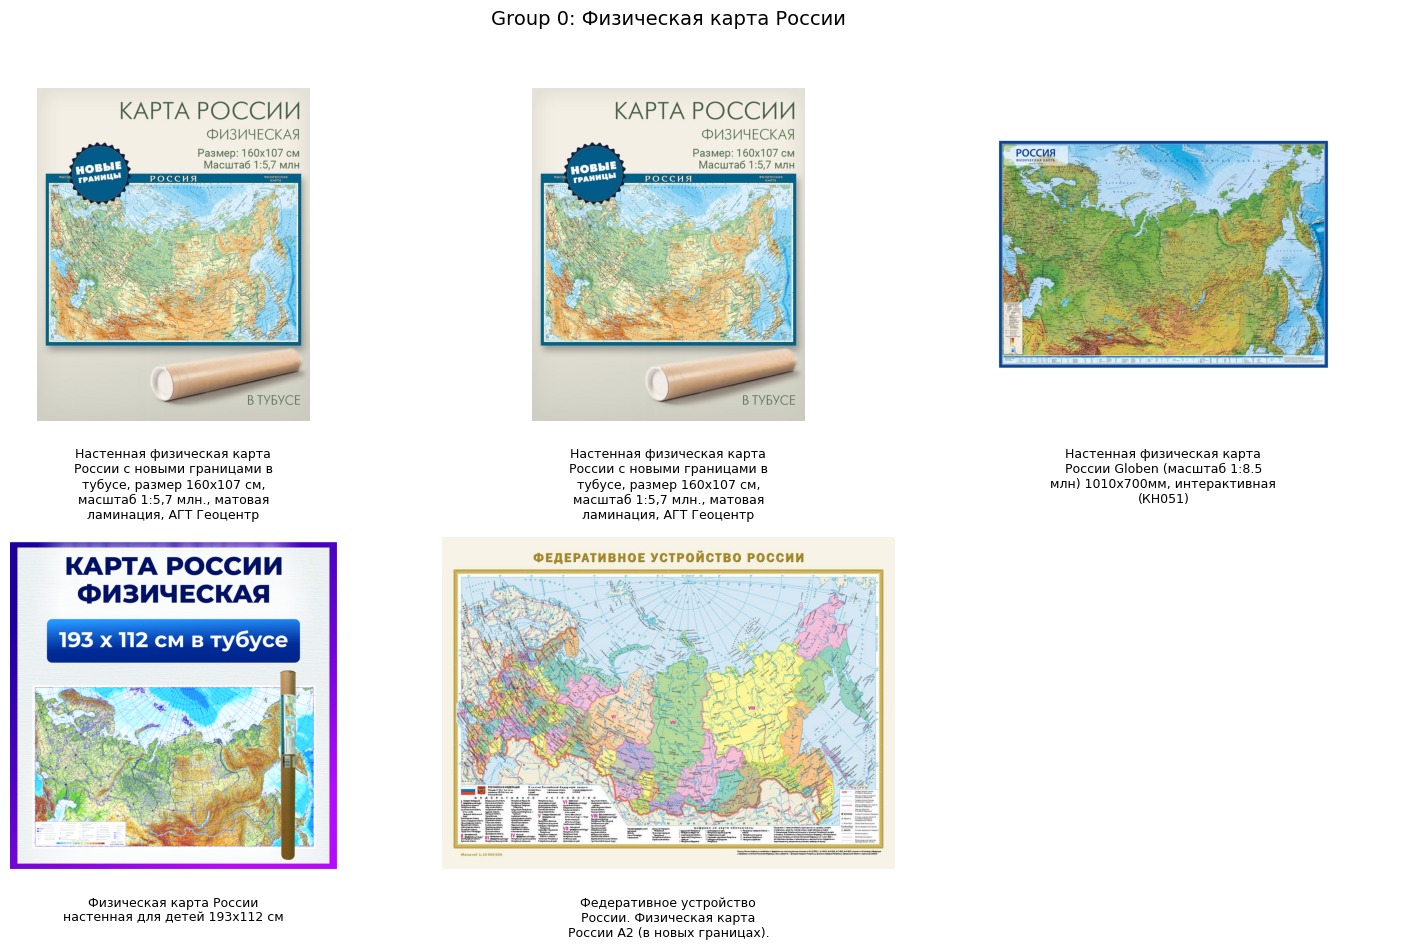

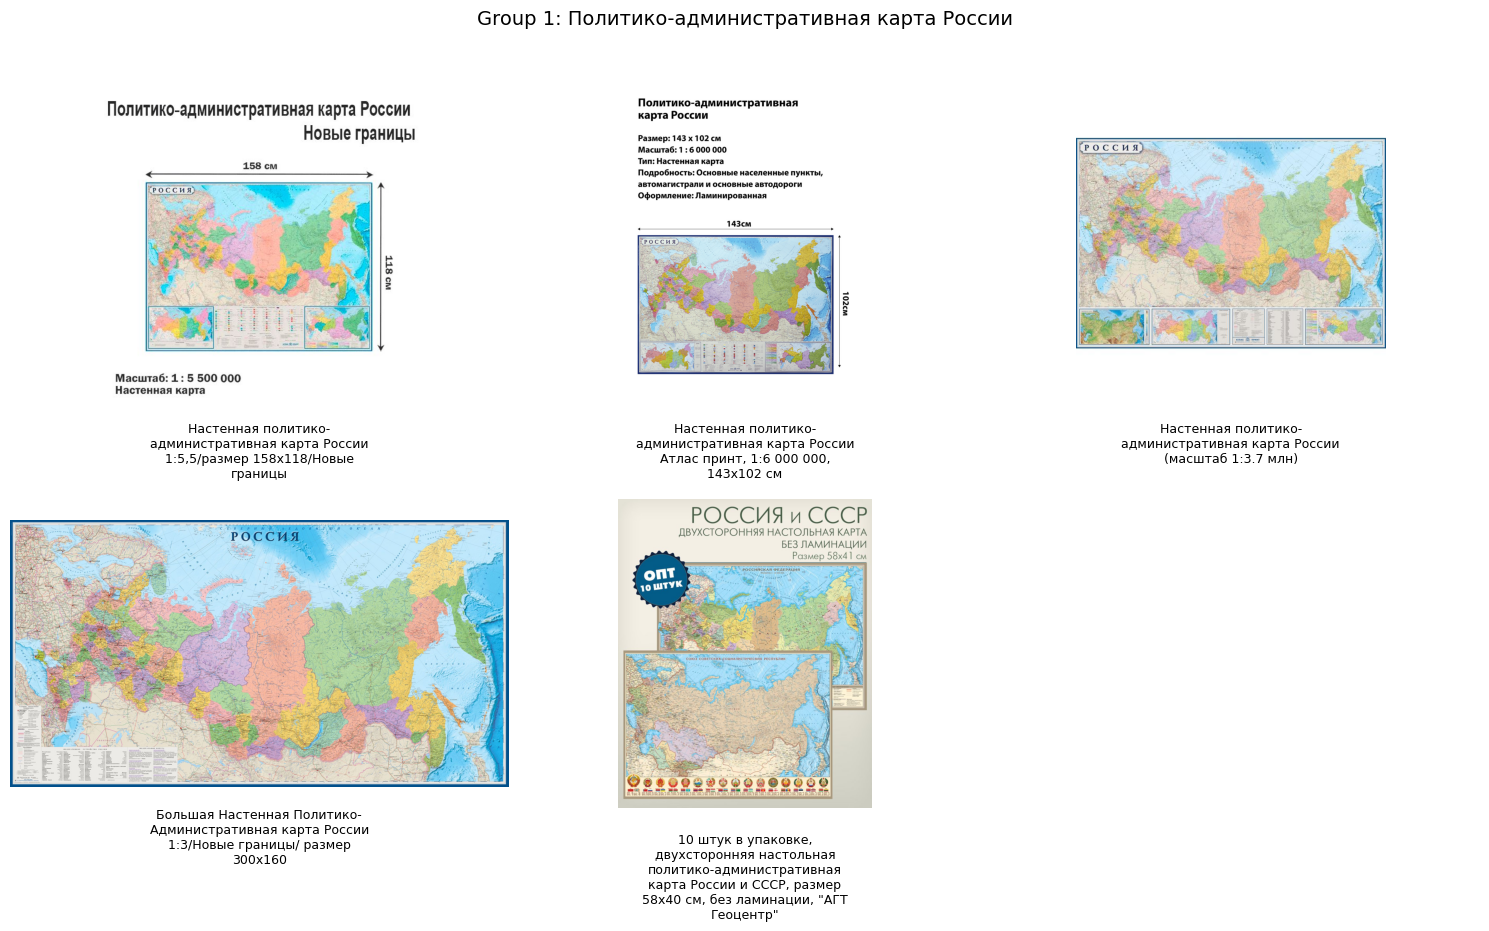

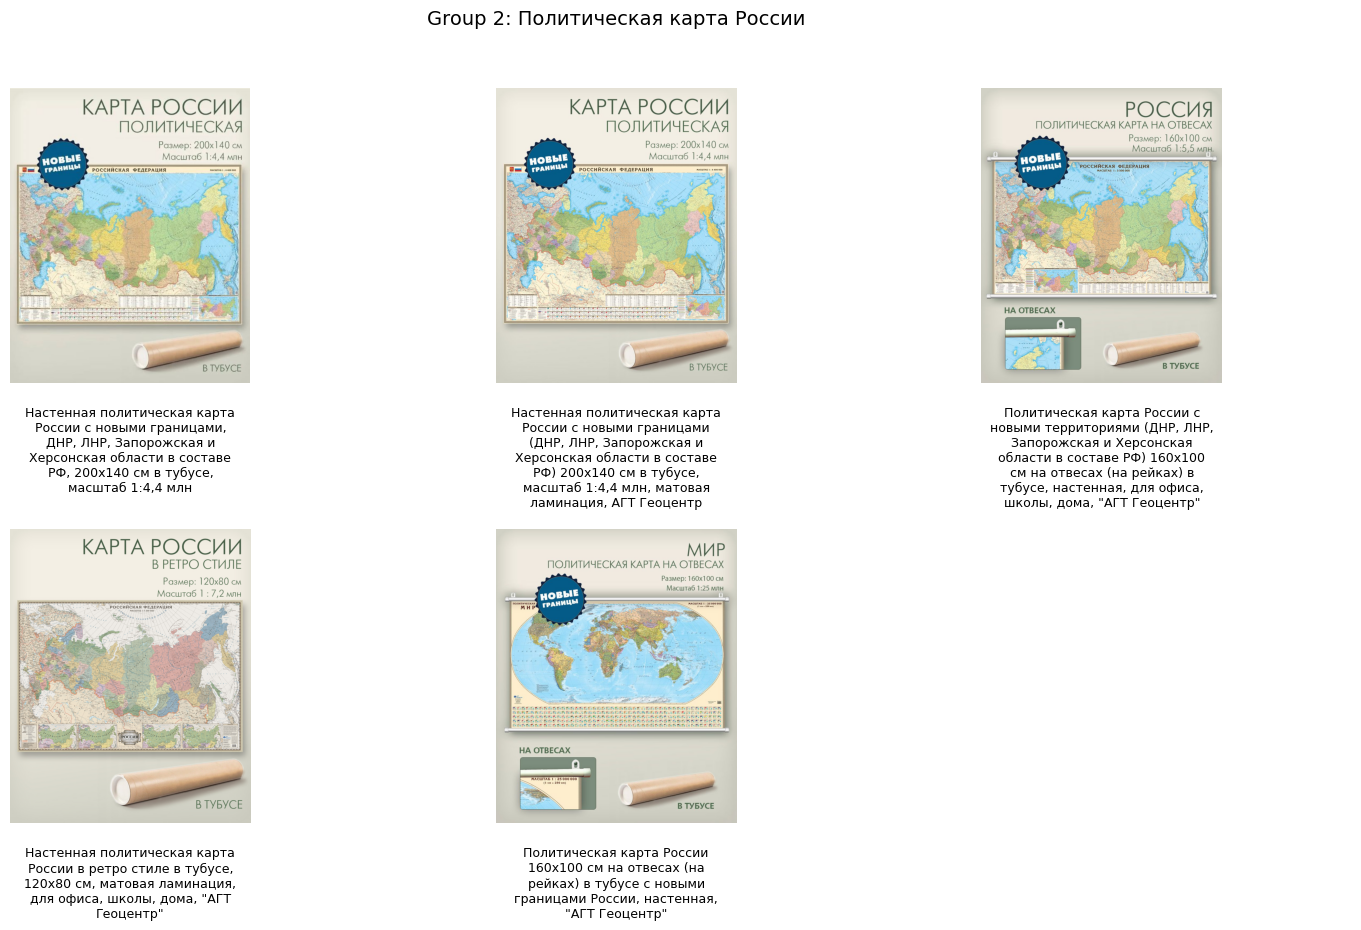

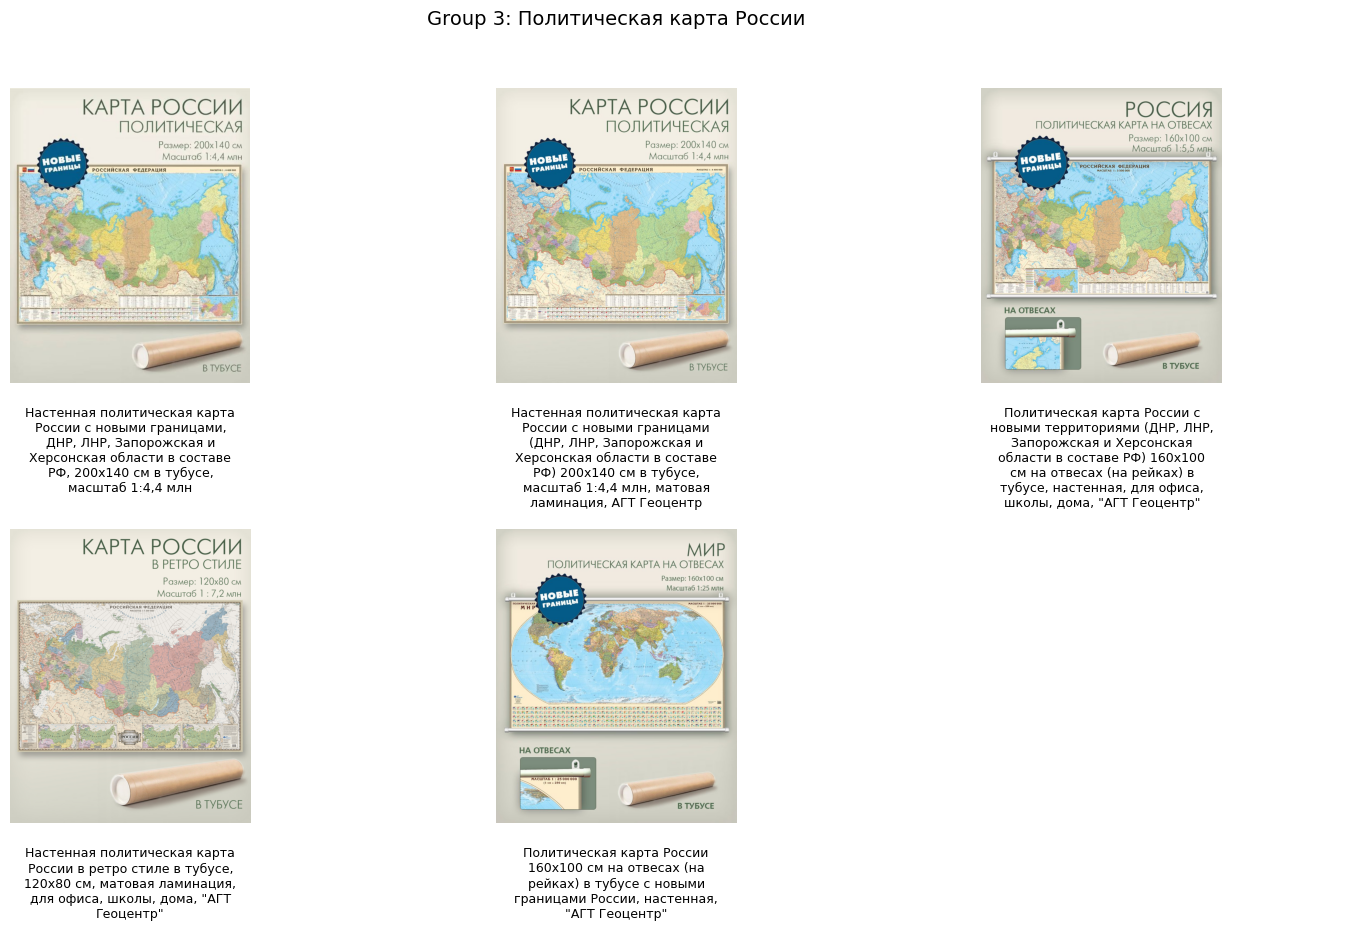

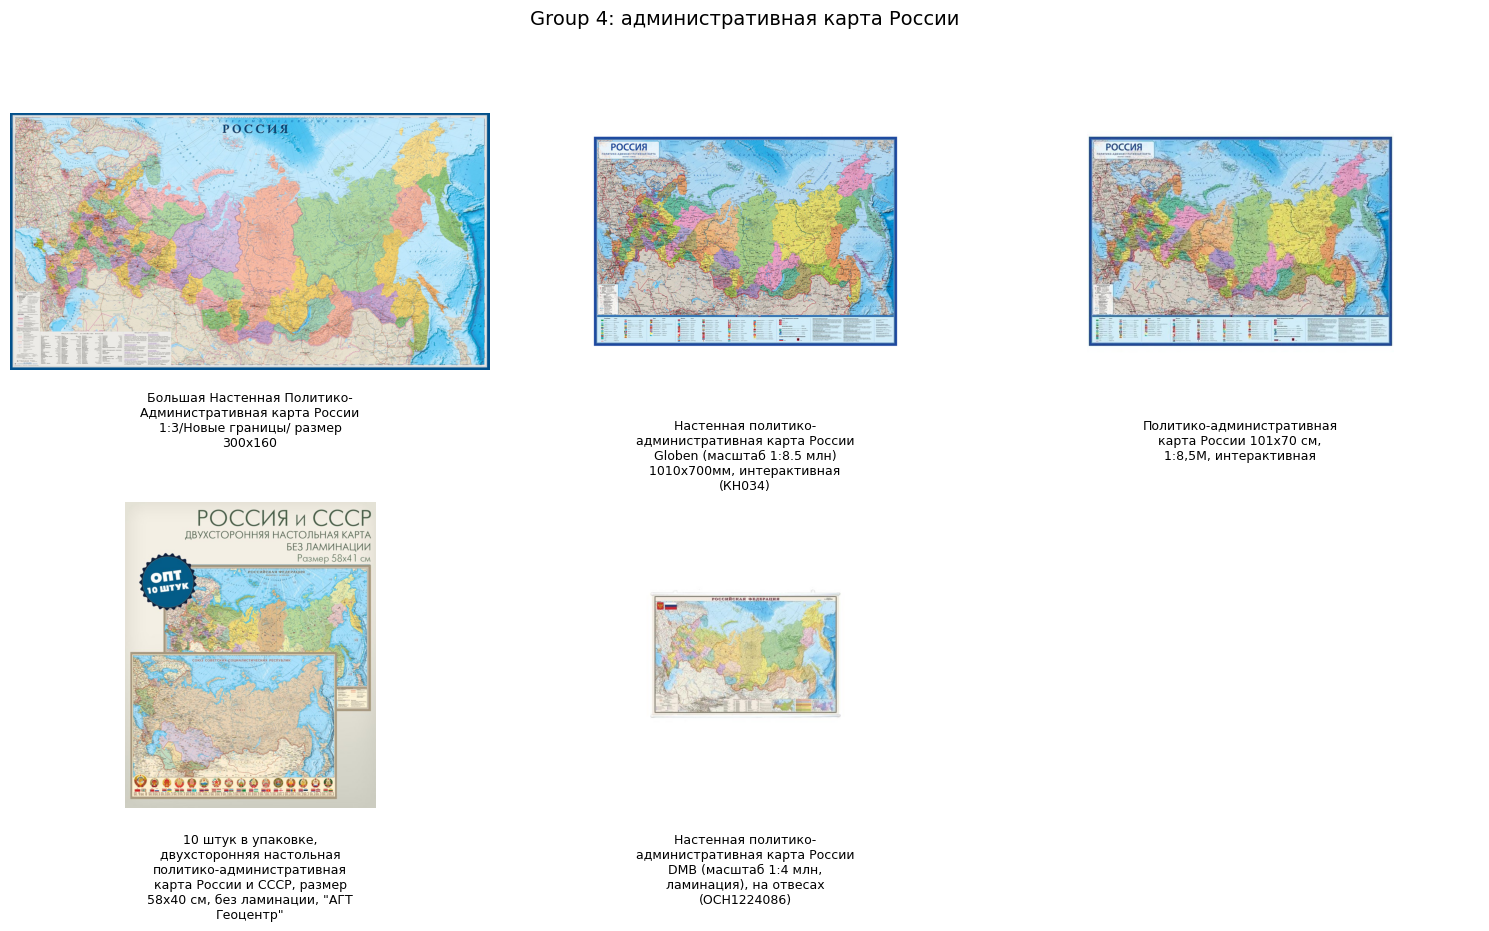

In [192]:
# from pathlib import Path
# # IMAGES_DIR = Path('../competitors-xgb/data/images_OZ_geo_5500')

# plot_samples_grid_by_group(
#     sample_df,
#     images_dir=IMAGES_DIR,
#     image_col='image_name',   # or whatever your column is
#     name_col='name',          # column containing the product name
#     ncols=3,
#     figsize=(15, 10)
# )


In [170]:
# # Визуализация картинок для сэмплов по категориям

# import matplotlib.pyplot as plt
# from PIL import Image

# for group_id, group_df in sample_df.groupby('group_id'):
#     N = len(group_df)
#     fig, axes = plt.subplots(N, 2, figsize=(8, 4 * N))
#     axes = axes.reshape(N, 2)

#     for idx, (_, row) in enumerate(group_df.iterrows()):
#         img = Image.open(IMAGES_DIR / row['image_name'])
#         axes[idx, 0].imshow(img)
#         axes[idx, 0].axis('off')
#         text = f"{row['name']}\nSKU: {row['sku']}"
#         axes[idx, 1].text(0.5, 0.5, text, ha='center', va='center', wrap=True)
#         axes[idx, 1].axis('off')

#     fig.suptitle(f"Group {group_id}", fontsize=16, y=1.02)
#     plt.tight_layout()
#     plt.show()


## Prompts

In [102]:
prompts = {}

def add_prompt(name, prompt, kwargs={}):
    prompts[name] = {}
    prompts[name]['name'] = name
    prompts[name]['kwargs'] = kwargs
    prompts[name]['template'] = prompt

In [103]:
# Default prompt

prompt = """
For each input sku identify it's duplicates and most similar skus from the other sellers.
Consider skus to be similar if they have different sku and different seller and have similar attributes like width, height, type and packaging.
Consider similar skus to be duplicates only if they have exact same attributes but different skus and different sellers.

Treat each sku as a query and find its duplicates and similar skus among skus from other sellers.
For each query sku having more than one similar sku output a list of skus in .csv format like this:
sku_query,"sku_duplicate_1;sku_duplicate_2;...;sku_duplicate_N","sku_similar_1;sku_similar_2;...;sku_similar_N"
If duplicates are not found, output only similar skus:
sku_query,"","sku_similar_1;sku_similar_2;...;sku_similar_N",
If none similar skus are found do NOT output a row like this:
sku_query,"",""

Make sure every sku in the input list either has similar skus and duplicates listed or skipped because it doesnt have any similar skus.
Output no more than 3 duplicates and no more than 5 similar skus per query sku.

Output a single table with these exact columns:
0. sku_query
1. sku_duplicate
2. sku_similar

Input:
{input_descriptions}
"""

add_prompt('default', prompt)

In [104]:
# Prompt 1

# 1. limit the number of duplicates and similar skus
# 2. always use double quotes for the lists

prompt = """
For each input SKU identify its duplicates and most similar SKUs from other sellers.
Always enclose both the sku_duplicate and sku_similar lists in double quotes.
Consider SKUs similar if they have different SKU codes, different sellers, and share attributes (width, height, type, packaging).
Consider similar SKUs to be duplicates only when all attributes match exactly but SKU codes and sellers differ.

Treat each SKU as a query and find its duplicates and similar SKUs among other sellers.
For each query SKU with ≥1 similar SKU, output one CSV line:
sku_query,"sku_dup1;sku_dup2;…","sku_sim1;sku_sim2;…"
If no duplicates, leave sku_duplicate as "":
sku_query,"","sku_sim1;sku_sim2;…"
Skip any SKU with no similar SKUs.

Limit to ≤3 duplicates and ≤5 similars per query.
Output a single table with exact columns:
0. sku_query
1. sku_duplicate
2. sku_similar

Input:
{input_descriptions}
"""

add_prompt('1_0_use_double_quotes', prompt)

In [105]:
# Prompt 2

# 1. limit the number of duplicates and similar skus
# 2. always use double quotes for the lists
# 3. ignore symmetrical entries (A,B and B,A are the same)

prompt = """
Task ‑ Find duplicates and similar SKUs among different sellers
──────────────────────────────────────────────────────────────────
Definitions
• Similar SKU – different sku_code AND different seller, yet attributes
  (width, height, type, packaging) are broadly similar.
• Duplicate SKU – different sku_code AND different seller AND all
  attributes match exactly.

Processing rules
1. Sort input SKUs in ascending alphanumeric order.
2. Keep a running “seen” set of every sku_code that has already been
   emitted (as sku_query, sku_duplicate or sku_similar).
3. For the current SKU Q:
   • If Q is in the seen set, SKIP it (its group is already printed).
   • Otherwise, collect up to 3 duplicates and up to 5 similar SKUs
     from other sellers.
   • If Q has zero similar SKUs, SKIP it.
4. Emit one CSV row with this exact header and column order:

sku_query,sku_duplicate,sku_similar

Row syntax (lists ALWAYS in double quotes):
sku_query,"dup1;dup2;dup3","sim1;sim2;sim3;sim4;sim5"

• Use empty quotes if no duplicates:  sku_query,"","sim1;…"
• Never output a line where both list columns are "".

Input placeholder
────────────────
{input_descriptions}
"""

add_prompt('2_0_ignore_symmetrical_entries', prompt)

In [106]:
# Prompt 3

# 1. limit the number of duplicates and similar skus
# 2. always use double quotes for the lists
# 3. ignore symmetrical entries (A,B and B,A are the same)
# 4. domain knowledge injection

dk_injection = """
Категория товара: Карты географические

1. Общий тип:
- настенная
- складная
2. Упаковка:
- Нет особой упаковки
- Тубус
3. Крепление: 
- Нет особого крепления
- На рейках (отвесах)
4. Назначение:
- для дома/офиса/школы (для детей-школьников)
- для туристов/водителей
- для маленьких детей
5. Область покрытия:
- Мир
- Конкретная страна (Россия)
- Конкретная область или город (Москва и область, Санкт-Петербург, Мурманская область)
"""

prompt = """
Task ‑ Find duplicates and similar SKUs among different sellers
──────────────────────────────────────────────────────────────────
Definitions
• Similar SKU – different sku_code AND different seller, yet attributes
  (width, height, type, packaging) are broadly similar.
• Duplicate SKU – different sku_code AND different seller AND all
  attributes match exactly.
• SKU attributes can be of two types:
  1. Blocking attributes. If a product for a given SKU doesnt have same attribute, it cannot be similar.
  2. Non-blocking attributes. If a product for a given SKU doesnt have same attribute, it can still be similar.

Processing rules
1. Sort input SKUs in ascending alphanumeric order.
2. Keep a running “seen” set of every sku_code that has already been
   emitted (as sku_query, sku_duplicate or sku_similar).
3. For the current SKU Q:
   • If Q is in the seen set, SKIP it (its group is already printed).
   • Otherwise, collect up to 3 duplicates and up to 5 similar SKUs
     from other sellers.
   • If Q has zero similar SKUs, SKIP it.
4. Emit one CSV row with this exact header and column order:
5. Make sure to determine duplicates according to the following blocking attributes:
6. If two products have different blocking attributes, they cannot be duplicates.
{dk_injection}

sku_query,sku_duplicate,sku_similar

Row syntax (lists ALWAYS in double quotes):
sku_query,"dup1;dup2;dup3","sim1;sim2;sim3;sim4;sim5"

• Use empty quotes if no duplicates:  sku_query,"","sim1;…"
• Never output a line where both list columns are "".

Input placeholder
────────────────
{input_descriptions}
"""

add_prompt(
  '3_0_domain_knowledge_injection', prompt,
           {'dk_injection': dk_injection}
          )

In [107]:
# Prompt 3.1

# 1. limit the number of duplicates and similar skus
# 2. always use double quotes for the lists
# 3. ignore symmetrical entries (A,B and B,A are the same)
# 4. domain knowledge injection (explicit)

prompt = """
Категория: географические карты  
────────────────────────────────

Блокирующие атрибуты  
(обязательно сравнивать; различие ⇒ НЕ дубликат и НЕ похожий)  
1. Общий тип: настенная | складная  
2. Упаковка: нет упаковки | тубус  
3. Крепление: нет крепления | на рейках  
4. Назначение: дом/офис/школа | туристы/водители | маленькие дети  
5. Область покрытия: мир | страна | регион/город  
6. Размеры: ширина × высота (в см)

Неблокирующие атрибуты — цвет, масштаб, язык подписи и т.п.  
────────────────────────────────
Задача — найти дубликаты и схожие SKU разных продавцов
────────────────────────────────

Определения  
• **Дубликат** — другой sku_code и другой seller, **все** блокирующие атрибуты совпадают 1‑к‑1 и **все** неблокирующие атрибуты совпадают. 
• **Похожий** — другой sku_code и другой seller, **все** блокирующие атрибуты совпадают 1‑к‑1, некоторые неблокирующие совпадают. 

Алгоритм  
1. Обработай входные SKU в алфавитном порядке.  
2. Веди множество *seen* (SKU, появившиеся в любой колонке).  
3. Для текущего SKU Q:  
   • Если Q ∈ *seen* → пропусти.  
   • Иначе найди ≤ 3 дубликата и ≤ 5 похожих SKU других продавцов.  
   • Пропусти Q, если похожих нет.  
   • Добавь Q и найденные SKU в *seen*.  
4. Сравни **каждый** из 6 блокирующих атрибутов перед тем, как пометить SKU как дубликат. Игнорировать их запрещено.

Формат вывода  
Заголовок:  
sku_query,sku_duplicate,sku_similar
Строка:  
sku_query,"dup1;dup2;dup3","sim1;sim2;…"

• Если дубликатов нет → `"",`  
• Не выводи строку `"","",""`.

Входные данные  
────────────────  
{input_descriptions}

"""

add_prompt('3_1_explicit_domain_knowledge', prompt)

In [108]:
# Prompt 3.2

# 1. limit the number of duplicates and similar skus
# 2. always use double quotes for the lists
# 3. ignore symmetrical entries (A,B and B,A are the same)
# 4. domain knowledge injection (explicit, strict)

prompt = """
Категория: географические карты  
────────────────────────────────

‼️ БЛОКИРУЮЩИЕ АТРИБУТЫ – ОБЯЗАТЕЛЬНО ДОЛЖНЫ СОВПАДАТЬ ДЛЯ ЛЮБОЙ СВЯЗИ  
1. Общий тип: настенная | складная  
2. Упаковка: нет упаковки | тубус  
3. Крепление: нет крепления | на рейках  
4. Назначение: дом/офис/школа | туристы/водители | маленькие дети  
5. Область покрытия: мир | страна | регион/город  
6. Размеры: ширина × высота (в см)

❌ Если **хотя бы ОДИН** блокирующий атрибут различается → товары **НЕ** считаются ни дубликатами, ни похожими!  
(цвет, масштаб, язык и пр. — необязательные, сравнивать не нужно)

────────────────────────────────
Задача — найти дубликаты и схожие SKU разных продавцов
────────────────────────────────

Определения  
• **Дубликат** — другой sku_code и seller, **ВСЕ** блокирующие атрибуты совпадают 1‑к‑1.  
• **Похожий** — другой sku_code и seller, **ВСЕ** блокирующие атрибуты совпадают, но есть небольшие расхождения в необязательных характеристиках (цвет, масштаб и т. д.).  
• Любое расхождение в блокирующем атрибуте ⇒ «неродственный» товар (не выводится).

Алгоритм  
1. Обработай входные SKU по возрастанию.  
2. Веди множество *seen* (SKU, уже попавшие в любую колонку).  
3. Для SKU Q:  
   • Если Q ∈ *seen* → пропусти.  
   • Иначе найди ≤ 3 дубликата и ≤ 5 похожих среди других продавцов.  
   • Игнорируй товары, у которых не совпадает **хотя бы один** блокирующий атрибут.  
   • Если похожих нет → пропусти Q.  
   • Добавь Q и найденные SKU в *seen*.  
4. Перед записью **обязательно ещё раз** проверь совпадение всех 6 блокирующих атрибутов.

Формат вывода  
Заголовок:  
sku_query,sku_duplicate,sku_similar
Строка:  
sku_query,"dup1;dup2;dup3","sim1;sim2;…"

• Если дубликатов нет → `"",`  
• Не выводи строку `"","",""`.

Входные данные  
────────────────  
{input_descriptions}
"""

add_prompt('3_2_strict_domain_knowledge', prompt)

In [109]:
# Prompt 4 (duplicate products)

# 1. limit the number of duplicates and similar skus
# 2. always use double quotes for the lists
# 3. ignore symmetrical entries (A,B and B,A are the same)
# 4. hard-coded domain knowledge

prompt = """
Task ‑ Find duplicate products among different sellers
──────────────────────────────────────────────────────────────────
Definitions
- A pair of products is considered a DUPLICATE then and only then when:
  1. They have different sku_code
  2. AND They have different seller
  3. AND all key attributes of the products match EXACTLY

Processing rules
1. Sort input SKUs in ascending alphanumeric order.
2. Keep a running “seen” set of every sku_code that has already been
   emitted (as sku_query, sku_duplicate or sku_similar).
3. For the current SKU Q:
   • If Q is in the seen set, SKIP it (its group is already printed).
   • Otherwise, collect up to 3 duplicates and up to 5 similar SKUs
     from other sellers.
   • If Q has zero similar SKUs, SKIP it.
4. Emit one CSV row with this exact header and column order:

sku_query,sku_duplicate

Row syntax (lists ALWAYS in double quotes):
sku_query,"dup1;dup2;dup3"

• Never output a line where a query has no duplicates: sku_query,""

Input placeholder
────────────────
{input_descriptions}
"""

add_prompt('4_0_duplicate_products', prompt)

In [110]:
# Prompt 5 (duplicate products with domain knowledge)

# 1. limit the number of duplicates and similar skus
# 2. always use double quotes for the lists
# 3. ignore symmetrical entries (A,B and B,A are the same)
# 4. hard-coded domain knowledge

domain = "Карты географические"

blocking_attributes = """
1. Общий тип:
Товары являются дубликатами, только если они имеют одинаковый общий тип:
- настенная
- складная
2. Упаковка:
Товары являются дубликатами, только если они имеют одинаковую упаковку:
- нет упаковки
- тубус
3. Крепление:
Товары являются дубликатами, только если они имеют одинаковое крепление:
- нет крепления
- на рейках
4. Назначение:
Товары являются дубликатами, только если они имеют одинаковое назначение:
- общего назначения или для офиса/школы (для детей-школьников)
- для туристов/водителей
- для маленьких детей
5. Область покрытия:
Товары являются дубликатами, только если они имеют одинаковую область покрытия:
- мир
- страна
- регион/город
6. Размеры:
Товары являются дубликатами, только если они имеют одинаковые размеры:
- ширина × высота (в см)
"""

prompt = """
Task ‑ Find duplicate products among different sellers for category: {domain}
──────────────────────────────────────────────────────────────────
Definitions
- A pair of products is considered a DUPLICATE then and only then when:
  1. They have different sku_code
  2. AND They have different seller
  3. AND all key attributes of the products match EXACTLY
- Products are considered duplicates ONLY if all blocking attributes match exactly.
- If at least one blocking attribute differs, the products are considered NOT duplicates.

Processing rules
1. Sort input SKUs in ascending alphanumeric order.
2. Keep a running “seen” set of every sku_code that has already been
   emitted (as sku_query, sku_duplicate or sku_similar).
3. For the current SKU Q:
   • If Q is in the seen set, SKIP it (its group is already printed).
   • Otherwise, collect up to 3 duplicates and up to 5 similar SKUs
     from other sellers.
   • If Q has zero similar SKUs, SKIP it.
4. Emit one CSV row with this exact header and column order:

sku_query,sku_duplicate

Row syntax (lists ALWAYS in double quotes):
sku_query,"dup1;dup2;dup3"

• Never output a line where a query has no duplicates: sku_query,""

Blocking attributes:
────────────────
{blocking_attributes}

Product descriptions:
────────────────
{input_descriptions}
"""

add_prompt(
  '5_0_duplicate_products_with_domain_knowledge',
  prompt,
  kwargs={
    'domain': domain,
    'blocking_attributes': blocking_attributes,
  } 
)

In [111]:
# Prompt 5.1 (duplicate products with domain knowledge)

# 1. limit the number of duplicates and similar skus
# 2. always use double quotes for the lists
# 3. ignore symmetrical entries (A,B and B,A are the same)
# 4. hard-coded domain knowledge
# 5. numerical blocking attributes are compared as floats

domain = "Карты географические"

blocking_attributes = """
1. Общий тип:
Товары являются дубликатами, только если они имеют одинаковый общий тип:
- настенная
- складная
2. Упаковка:
Товары являются дубликатами, только если они имеют одинаковую упаковку:
- нет упаковки
- тубус
3. Крепление:
Товары являются дубликатами, только если они имеют одинаковое крепление:
- нет крепления
- на рейках
4. Назначение:
Товары являются дубликатами, только если они имеют одинаковое назначение:
- общего назначения или для офиса/школы (для детей-школьников)
- для туристов/водителей
- для маленьких детей
5. Область покрытия:
Товары являются дубликатами, только если они имеют одинаковую область покрытия:
- мир
- страна
- регион/город
6. Размеры (**численный атрибут**):
Товары являются дубликатами, только если они имеют одинаковые размеры:
- ширина × высота (в см)
"""

prompt = """
Task ‑ Find duplicate products among different sellers for category: {domain}
──────────────────────────────────────────────────────────────────
Definitions
- A pair of products is considered a DUPLICATE then and only then when:
  1. They have different sku_code
  2. AND They have different seller
  3. AND all key attributes of the products match EXACTLY
- Products are considered duplicates ONLY if all blocking attributes match exactly.
- If at least one blocking attribute differs, the products are considered NOT duplicates.
- Blocking attributes can be either categorical or numerical.
- When comparing numerical blocking attributes, compare their values as floats.
- If two products differ in **numerical** blocking attributes, they are NOT duplicates.

Processing rules
1. Sort input SKUs in ascending alphanumeric order.
2. Keep a running “seen” set of every sku_code that has already been
   emitted (as sku_query, sku_duplicate or sku_similar).
3. For the current SKU Q:
   • If Q is in the seen set, SKIP it (its group is already printed).
   • Otherwise, collect up to 3 duplicates and up to 5 similar SKUs
     from other sellers.
   • If Q has zero similar SKUs, SKIP it.
4. Emit one CSV row with this exact header and column order:

sku_query,sku_duplicate

Row syntax (lists ALWAYS in double quotes):
sku_query,"dup1;dup2;dup3"

• Never output a line where a query has no duplicates: sku_query,""

Blocking attributes:
────────────────
{blocking_attributes}

Product descriptions:
────────────────
{input_descriptions}
"""

add_prompt(
  '5_1_duplicate_products_with_domain_knowledge',
  prompt,
  kwargs={
    'domain': domain,
    'blocking_attributes': blocking_attributes,
  } 
)

In [112]:
# Prompt 5.2 (duplicate products with domain knowledge, numerical blocking attributes v2)

# 1. limit the number of duplicates and similar skus
# 2. always use double quotes for the lists
# 3. ignore symmetrical entries (A,B and B,A are the same)
# 4. hard-coded domain knowledge
# 5. numerical blocking attributes are compared as floats (enhanced)

domain = "Карты географические"

blocking_attributes = """
1. Общий тип:
Товары являются дубликатами, только если они имеют одинаковый общий тип:
- настенная
- складная
2. Упаковка:
Товары являются дубликатами, только если они имеют одинаковую упаковку:
- нет упаковки
- тубус
3. Крепление:
Товары являются дубликатами, только если они имеют одинаковое крепление:
- нет крепления
- на рейках
4. Назначение:
Товары являются дубликатами, только если они имеют одинаковое назначение:
- общего назначения или для офиса/школы (для детей‑школьников)
- для туристов/водителей
- для маленьких детей
5. Область покрытия:
Товары являются дубликатами, только если они имеют одинаковую область покрытия:
- мир
- страна
- регион/город
6. Размеры (🔢 **численный атрибут**):
Товары являются дубликатами, только если они имеют одинаковые размеры.
Сравни ширину и высоту как ЧИСЛА (float, см); любая разница → не дубликаты.
"""

prompt = """
Task – Find duplicate products among different sellers for category: {domain}
──────────────────────────────────────────────────────────────────
Definitions
• A pair of products is a **DUPLICATE** only when  
  1. sku_code differs  
  2. seller differs  
  3. **ALL** blocking attributes match **EXACTLY**.
• If at least one blocking attribute (categorical **или** численный) differs → NOT duplicates.  
• Когда сравниваешь ЧИСЛЕННЫЕ блокирующие атрибуты (ширина, высота),  
  ПРЕОБРАЗУЙ значения в float и сравнивай их **как числа**; любое расхождение = не дубликаты.

Processing rules
1. Sort input SKUs in ascending alphanumeric order.  
2. Maintain a *seen* set of every sku_code already emitted.  
3. For current SKU Q:  
   • If Q ∈ *seen* → skip.  
   • Else collect ≤ 3 duplicates from other sellers.  
   • Skip Q if duplicates list is empty.  
4. Emit one CSV row with header and **exact** columns:

sku_query,sku_duplicate

Format (list ALWAYS in double quotes):  
sku_query,"dup1;dup2;dup3"

• Never output: sku_query,""  (row without duplicates)

Blocking attributes
────────────────
{blocking_attributes}

Product descriptions
────────────────
{input_descriptions}
"""


add_prompt(
  '5_2_duplicate_products_with_domain_knowledge',
  prompt,
  kwargs={
    'domain': domain,
    'blocking_attributes': blocking_attributes,
  } 
)

In [113]:
# Prompt 5.3 (duplicate products with domain knowledge)

# 1. limit the number of duplicates and similar skus
# 2. always use double quotes for the lists
# 3. ignore symmetrical entries (A,B and B,A are the same)
# 4. hard-coded domain knowledge
# 5. numerical blocking attributes are compared as floats (enhanced)
# 6. edited blocking attributes (назначение)

domain = "Карты географические"

blocking_attributes = """
1. Общий тип:
Товары являются дубликатами, только если они имеют одинаковый общий тип:
- настенная
- складная
2. Упаковка:
Товары являются дубликатами, только если они имеют одинаковую упаковку:
- нет упаковки
- тубус
3. Крепление:
Товары являются дубликатами, только если они имеют одинаковое крепление:
- нет крепления
- на рейках
4. Назначение:
Товары являются дубликатами, только если они имеют одинаковое назначение:
- для офиса, школы, дома
- автомобильная
- для маленьких детей
5. Область покрытия:
Товары являются дубликатами, только если они имеют одинаковую область покрытия:
- мир
- страна
- регион/город
6. Размеры (🔢 **численный атрибут**):
Товары являются дубликатами, только если они имеют одинаковые размеры.
Сравни ширину и высоту как ЧИСЛА (float, см); любая разница → не дубликаты.
"""

prompt = """
Task – Find duplicate products among different sellers for category: {domain}
──────────────────────────────────────────────────────────────────
Definitions
• A pair of products is a **DUPLICATE** only when  
  1. sku_code differs  
  2. seller differs  
  3. **ALL** blocking attributes match **EXACTLY**.
• If at least one blocking attribute (categorical **или** численный) differs → NOT duplicates.  
• Когда сравниваешь ЧИСЛЕННЫЕ блокирующие атрибуты (ширина, высота),  
  ПРЕОБРАЗУЙ значения в float и сравнивай их **как числа**; любое расхождение = не дубликаты.

Processing rules
1. Sort input SKUs in ascending alphanumeric order.  
2. Maintain a *seen* set of every sku_code already emitted.  
3. For current SKU Q:  
   • If Q ∈ *seen* → skip.  
   • Else collect ≤ 3 duplicates from other sellers.  
   • Skip Q if duplicates list is empty.  
4. Emit one CSV row with header and **exact** columns:

sku_query,sku_duplicate

Format (list ALWAYS in double quotes):  
sku_query,"dup1;dup2;dup3"

• Never output: sku_query,""  (row without duplicates)

Blocking attributes
────────────────
{blocking_attributes}

Product descriptions
────────────────
{input_descriptions}
"""


add_prompt(
  '5_3_duplicate_products_with_domain_knowledge',
  prompt,
  kwargs={
    'domain': domain,
    'blocking_attributes': blocking_attributes,
  } 
)

In [114]:
# Prompt 5.4 (duplicate products with domain knowledge)

prompt_name = '5_4_duplicate_products_with_domain_knowledge'

# 1. limit the number of duplicates and similar skus
# 2. always use double quotes for the lists
# 3. ignore symmetrical entries (A,B and B,A are the same)
# 4. hard-coded domain knowledge
# 5. numerical blocking attributes are compared as floats (enhanced)
# 6. edited blocking attributes (назначение)
# 7. edited blocking attributes (крепление)

domain = "Карты географические"

blocking_attributes = """
1. Общий тип:
Товары являются дубликатами, только если они имеют одинаковый общий тип:
- настенная
- складная
2. Упаковка:
Товары являются дубликатами, только если они имеют одинаковую упаковку:
- нет упаковки
- тубус
3. Крепление:
Товары являются дубликатами, только если они имеют одинаковое крепление:
- с помощью скотча или кнопок
- с отвесами (рейками) на петлях
4. Назначение:
Товары являются дубликатами, только если они имеют одинаковое назначение:
- для офиса, школы, дома
- автомобильная
- для маленьких детей
5. Область покрытия:
Товары являются дубликатами, только если они имеют одинаковую область покрытия:
- мир
- страна
- регион/город
6. Размеры (🔢 **численный атрибут**):
Товары являются дубликатами, только если они имеют одинаковые размеры.
Сравни ширину и высоту как ЧИСЛА (float, см); любая разница → не дубликаты.
"""

prompt = """
Task – Find duplicate products among different sellers for category: {domain}
──────────────────────────────────────────────────────────────────
Definitions
• A pair of products is a **DUPLICATE** only when  
  1. sku_code differs  
  2. seller differs  
  3. **ALL** blocking attributes match **EXACTLY**.
• If at least one blocking attribute (categorical **или** численный) differs → NOT duplicates.  
• Когда сравниваешь ЧИСЛЕННЫЕ блокирующие атрибуты (ширина, высота),  
  ПРЕОБРАЗУЙ значения в float и сравнивай их **как числа**; любое расхождение = не дубликаты.

Processing rules
1. Sort input SKUs in ascending alphanumeric order.  
2. Maintain a *seen* set of every sku_code already emitted.  
3. For current SKU Q:  
   • If Q ∈ *seen* → skip.  
   • Else collect ≤ 3 duplicates from other sellers.  
   • Skip Q if duplicates list is empty.  
4. Emit one CSV row with header and **exact** columns:

sku_query,sku_duplicate

Format (list ALWAYS in double quotes):  
sku_query,"dup1;dup2;dup3"

• Never output: sku_query,""  (row without duplicates)

Blocking attributes
────────────────
{blocking_attributes}

Product descriptions
────────────────
{input_descriptions}
"""


add_prompt(
  prompt_name,
  prompt,
  kwargs={
    'domain': domain,
    'blocking_attributes': blocking_attributes,
  } 
)

In [115]:
# Prompt 6 (detect both duplicates AND similar)

prompt_name = '6_0_duplicate_and_similar_products_with_domain_knowledge'

# 1. limit the number of duplicates and similar skus
# 2. always use double quotes for the lists
# 3. ignore symmetrical entries (A,B and B,A are the same)
# 4. hard-coded domain knowledge
# 5. numerical blocking attributes are compared as floats (enhanced)
# 6. edited blocking attributes (назначение)
# 7. edited blocking attributes (крепление)
# 8. add similar products detection

domain = "Карты географические"

blocking_attributes = """
CRITICAL BLOCKING ATTRIBUTES:
1. Общий тип:
Товары являются дубликатами, только если они имеют одинаковый общий тип:
- настенная
- складная
2. Область покрытия:
Товары являются дубликатами, только если они имеют одинаковую область покрытия:
- мир
- страна
- регион/город
2. Упаковка:
Товары являются дубликатами, только если они имеют одинаковую упаковку:
- нет упаковки
- тубус
3. Размеры (🔢 **численный атрибут**):
Товары являются дубликатами, только если они имеют одинаковые размеры.
Сравни ширину и высоту как ЧИСЛА (float, см); любая разница → не дубликаты.

NON-CRITICAL BLOCKING ATTRIBUTES:
1. Назначение:
Товары являются дубликатами, только если они имеют одинаковое назначение:
- для офиса, школы, дома
- автомобильная
- для маленьких детей
2. Крепление:
Товары являются дубликатами, только если они имеют одинаковое крепление:
- с помощью скотча или кнопок
- с отвесами (рейками) на петлях
3. Размеры (🔢 **численный атрибут**):
Товары являются дубликатами, только если они имеют ПРИМЕРНО одинаковые размеры (разница не более 10% по каждому измерению).
Сравни ширину и высоту как ЧИСЛА (float, см); если разница по одному из измерений больше 10% → не дубликаты и не похожие.
если разница по всем измерениям меньше 10% → похожий (возможно дубликат).
"""

prompt = """
Task – Find duplicate and similar products among different sellers for category: {domain}
──────────────────────────────────────────────────────────────────
Definitions
• A pair of products is a **DUPLICATE** only when  
  1. sku_code differs  
  2. seller differs  
  3. **ALL** CRITICAL and **ALL** NON-CRITICAL blocking attributes match **EXACTLY**.
• If at least one CRITICAL blocking attribute (categorical **или** численный) differs → NOT duplicates.  
• A pair of products is a **SIMILAR** only when  
  1. sku_code differs  
  2. seller differs  
  3. **ALL** CRITICAL and **AT LEAST ONE** NON-CRITICAL blocking attributes match **APPROXIMATELY**.
• If all CRITICAL blocking attributes match but all NON-CRITICAL blocking attributes (categorical **или** численный) differ → NOT similar.
• Когда сравниваешь ЧИСЛЕННЫЕ блокирующие атрибуты (ширина, высота),  
  ПРЕОБРАЗУЙ значения в float и сравнивай их **как числа**; любое расхождение = не дубликаты.

Processing rules
1. Sort input SKUs in ascending alphanumeric order.  
2. Maintain a *seen* set of every sku_code already emitted.  
3. For current SKU Q:  
   • If Q ∈ *seen* → skip.  
   • Else collect ≤ 3 duplicates from other sellers.  
   • Skip Q if duplicates list is empty.  
4. Emit one CSV row with header and **exact** columns:

sku_query,sku_duplicate,sku_similar
Строка:  
sku_query,"dup1;dup2;dup3","sim1;sim2;…"

• Если похожих нет → `"",`  
• Never output: sku_query,"",""  (row without duplicates and similar)

Blocking attributes
────────────────
{blocking_attributes}

Product descriptions
────────────────
{input_descriptions}
"""


add_prompt(
  prompt_name,
  prompt,
  kwargs={
    'domain': domain,
    'blocking_attributes': blocking_attributes,
  } 
)

In [116]:
# Prompt 6.1 (detect both duplicates AND similar)

prompt_name = '6_1_duplicate_and_similar_products_with_domain_knowledge'

# 1. limit the number of duplicates and similar skus
# 2. always use double quotes for the lists
# 3. ignore symmetrical entries (A,B and B,A are the same)
# 4. hard-coded domain knowledge
# 5. numerical blocking attributes are compared as floats (enhanced)
# 6. edited blocking attributes (назначение)
# 7. edited blocking attributes (крепление)
# 8. add similar products detection
# 9. edit prompt with GPT

domain = "Карты географические"

blocking_attributes = """
CRITICAL BLOCKING ATTRIBUTES  
(ВСЕ должны совпадать для DUPLICATE или SIMILAR)

1. Общий тип: настенная | складная  
2. Область покрытия: мир | страна | регион/город  
3. Упаковка: без упаковки | тубус  
4. Размеры 🔢 (численный): ширина × высота, см  
   • Считаются равными **только при точном совпадении**.  
   • Любая разница → не дубликаты и не похожие.

NON‑CRITICAL BLOCKING ATTRIBUTES  
(используются для различия DUPLICATE ↔ SIMILAR)

1. Назначение: офис/школа/дом | автомобильная | для детей  
2. Крепление: скотч/кнопки | рейки (отвесы)  
3. Размеры 🔢 (численный): ширина × высота, см  
   • Допускается отклонение ≤ 10 % по КАЖДОМУ измерению.  
   • > 10 % по хотя бы одному измерению → не дубликаты и не похожие.
"""

prompt = f"""
Task – Find **duplicate** and **similar** products among different sellers for category: {domain}
──────────────────────────────────────────────────────────────────
🔹 **DUPLICATE**  
  • sku_code разные, seller разные  
  • ВСЕ **CRITICAL** атрибуты совпадают **точно**  
  • ВСЕ **NON‑CRITICAL** атрибуты совпадают **точно**  
  • Для численных CRITICAL – сравни float; любое расхождение → не дубликаты.  
  • Для численных NON‑CRITICAL – расхождение ≤ 10 % допустимо ТОЛЬКО для SIMILAR (см. ниже).

🔹 **SIMILAR**  
  • sku_code разные, seller разные  
  • ВСЕ **CRITICAL** атрибуты совпадают **точно**  
  • Минимум ОДИН NON‑CRITICAL атрибут совпадает (остальные могут отличаться)  
  • Для численных NON‑CRITICAL – каждая ширина и высота может отличаться на ≤ 10 %.  
  • Если хотя бы один NON‑CRITICAL численный атрибут отличается > 10 % → НЕ похожие.

Если CRITICAL атрибуты НЕ совпадают → товары игнорируются (ни DUPLICATE, ни SIMILAR).

Processing rules  
1. Отсортируй входные SKU по возрастанию.  
2. Веди *seen* – все sku_code, уже появившиеся.  
3. Для SKU Q:  
   • Если Q ∈ *seen* – пропусти.  
   • Иначе собери ≤ 3 DUPLICATE и ≤ 5 SIMILAR из других продавцов.  
   • Пропусти Q, если список DUPLICATE пуст.  
4. Выведи CSV со строго таким заголовком:

sku_query,sku_duplicate,sku_similar

Строка:  
sku_query,"dup1;dup2;dup3","sim1;sim2;…"

• Если SIMILAR нет → `"",`  
• Не выводи: sku_query,"",""  (строка без дубликатов и похожих)

Blocking attributes  
────────────────  
{blocking_attributes}

Product descriptions  
────────────────  
{{input_descriptions}}
"""

add_prompt(
  prompt_name,
  prompt,
  kwargs={
    'domain': domain,
    'blocking_attributes': blocking_attributes,
  } 
)

# Main

## Run chain

In [117]:
# SET SYSTEM PROMPT

system_template = """
Your task is to assist in labeling positive pairs for cross-encoder fine-tuning on e-commerce domain.
Pay extra attention to the attributes when comparing products.
Answer in valid CSV format with a header.
Do NOT use triple quotes (```) before or after outputting CSV.
Do NOT write '```csv' before outputting CSV.
"""

In [118]:
print("Available user prompts:\n")
for p in list(prompts.keys()):
    print(f"'{p}'")


Available user prompts:

'default'
'1_0_use_double_quotes'
'2_0_ignore_symmetrical_entries'
'3_0_domain_knowledge_injection'
'3_1_explicit_domain_knowledge'
'3_2_strict_domain_knowledge'
'4_0_duplicate_products'
'5_0_duplicate_products_with_domain_knowledge'
'5_1_duplicate_products_with_domain_knowledge'
'5_2_duplicate_products_with_domain_knowledge'
'5_3_duplicate_products_with_domain_knowledge'
'5_4_duplicate_products_with_domain_knowledge'
'6_0_duplicate_and_similar_products_with_domain_knowledge'
'6_1_duplicate_and_similar_products_with_domain_knowledge'


In [173]:
# CHOOSE PROMPT & INPUT DATA

# Choose a prompt
chosen_prompt = prompts[
    # 'default'
    # '1_0_use_double_quotes'
    # '2_0_ignore_symmetrical_entries' # SECOND BEST
    # '3_0_domain_knowledge_injection'
    # '3_1_explicit_domain_knowledge'
    # '3_2_strict_domain_knowledge'
    # '4_0_duplicate_products'
    # '5_0_duplicate_products_with_domain_knowledge'
    # '5_1_duplicate_products_with_domain_knowledge'
    # '5_2_duplicate_products_with_domain_knowledge'
    # '5_3_duplicate_products_with_domain_knowledge'
    '5_4_duplicate_products_with_domain_knowledge' # BEST
    # '6_0_duplicate_and_similar_products_with_domain_knowledge'
    # '6_1_duplicate_and_similar_products_with_domain_knowledge'
]

# Choose a subset (or the full dataset)
chosen_subset_df = sample_df
# chosen_subset_df = full_df

# Choose description column to use as input
chosen_description_col = 'name_and_description'
# chosen_description_col = 'name'

In [120]:
# CHOOSE MODEL CONFIG

from langchain_openai import ChatOpenAI
from langchain.prompts import PromptTemplate, SystemMessagePromptTemplate, HumanMessagePromptTemplate, ChatPromptTemplate
from langchain.chains import LLMChain
from pathlib import Path
import pandas as pd

config = dict(
    model_name="openai/gpt-4.1-mini",
    # model_name="openai/gpt-4.1-nano",
    # model_name="deepseek/deepseek-chat",
    # model_name="google/gemma-3-27b-it",

    # temperature= 0.3,
    temperature= 0,

    openai_api_base="https://api.vsegpt.ru/v1", # VSE GPT; comment out for OpenAI
)

In [124]:
# RUN MODEL WITH CHOSEN CONFIG, PROMPT & INPUT DATA
import datetime

chosen_input_descriptions = get_input(chosen_subset_df, chosen_description_col)

# build your prompt templates
system = SystemMessagePromptTemplate.from_template(system_template)
human = HumanMessagePromptTemplate.from_template(chosen_prompt["template"])
chat_prompt = ChatPromptTemplate.from_messages([system, human])

# instantiate your LLM as before
chat = ChatOpenAI(
    **config,
    openai_api_key=OPENAI_API_KEY,
)

# --- minimal change: build a RunnableSequence instead of LLMChain ---
pipeline = chat_prompt | chat

# and invoke it instead of .run()
response_text = pipeline.invoke({
    "input_descriptions": chosen_input_descriptions,
    **chosen_prompt["kwargs"]
})

response_time = datetime.datetime.now().strftime("%y-%m-%d_%H-%M-%S")
response_text = response_text.text()

print("\nResponse text:")
print(response_text)

Input table to .csv:


sku                       seller  \
0  1153234977  Издательство "АГТ Геоцентр"   

                                name_and_description  
0  Настенная физическая карта России с новыми гра...

Input symbols count in .csv: 26329

Response text:
sku_query,sku_duplicate
1152004255,"1153234977"
518868320,"950207351"
601677896,"613582765"


In [125]:
# RECORD RENDERED PROMPT TO SAVE LATER
rendered_template = chosen_prompt['template'].format(
    input_descriptions=chosen_input_descriptions,
    **chosen_prompt['kwargs']
)

len(rendered_template)

28317

## Read response and restore full adjacency matrix

In [126]:
# READ RESPONSE
from io import StringIO

response_df = pd.read_csv(StringIO(response_text))
print(f'total rows: {len(response_df)}')
pd.set_option('display.float_format', '{:.0f}'.format)
response_df.head()

total rows: 3


sku_query  sku_duplicate
0  1152004255     1153234977
1   518868320      950207351
2   601677896      613582765

In [127]:
# PARSE ROWS IN RESPONSE
import pandas as pd
import numpy as np

def cell_to_list(x):
    # NaN → []
    if pd.isna(x):
        return []
    # Semicolon‑separated string → list of ints
    if isinstance(x, str):
        parts = [p for p in x.split(';') if p]
        return [int(p) for p in parts] if parts else []
    # Integer → single‑element list
    if isinstance(x, (int, np.integer)):
        return [int(x)]
    # Float → either [] if NaN or single‑element list
    if isinstance(x, (float, np.floating)):
        return [] if np.isnan(x) else [int(x)]
    # Fallback → []
    return []

processed_df = response_df.copy()
for col in ['sku_duplicate', 'sku_similar']:
    if col in processed_df.columns:
        processed_df[col] = processed_df[col].apply(cell_to_list)

processed_df.head()

sku_query sku_duplicate
0  1152004255  [1153234977]
1   518868320   [950207351]
2   601677896   [613582765]

In [128]:
# RESTORE FULL ADJACENCY MATRIX
import pandas as pd
import math
from collections import defaultdict
import itertools

def restore_full_adj(df: pd.DataFrame) -> pd.DataFrame:
    """
    From a DataFrame with:
      - sku_query
      - sku_duplicate (list of SKUs)
    and optionally:
      - sku_similar (list of SKUs)
    return a full adjacency list DataFrame that:
      • Includes one row per SKU seen anywhere.
      • Forms a full clique among duplicates of each input row (so every duplicate of a parent
        becomes duplicate with every other).
      • Likewise for similars if that column exists.
    """
    df = df.copy()
    has_similar = 'sku_similar' in df.columns

    # 1. Normalize: ensure lists, drop NaNs
    for col in ['sku_duplicate'] + (['sku_similar'] if has_similar else []):
        df[col] = df[col].apply(lambda x: x if isinstance(x, list) else [])

    # 2. Build adjacency sets
    adj = defaultdict(lambda: {'dup': set(), 'sim': set()})
    for _, row in df.iterrows():
        q = row['sku_query']

        # Duplicate clique: connect q and all its duplicates pairwise
        dup_group = [q] + row['sku_duplicate']
        for u, v in itertools.permutations(dup_group, 2):
            adj[u]['dup'].add(v)

        # Similar clique, only if present
        if has_similar:
            sim_group = [q] + row['sku_similar']
            for u, v in itertools.permutations(sim_group, 2):
                adj[u]['sim'].add(v)

    # 3. Gather every SKU seen anywhere
    all_skus = set(df['sku_query'])
    all_skus.update(itertools.chain.from_iterable(df['sku_duplicate']))
    if has_similar:
        all_skus.update(itertools.chain.from_iterable(df['sku_similar']))

    # 4. Build result DataFrame
    rows = []
    for sku in sorted(all_skus):
        entry = {
            'sku_query': sku,
            'sku_duplicate': sorted(adj[sku]['dup']),
        }
        if has_similar:
            entry['sku_similar'] = sorted(adj[sku]['sim'])
        rows.append(entry)

    return pd.DataFrame(rows)


In [129]:
full_adj_df = restore_full_adj(processed_df)
full_adj_df

sku_query sku_duplicate
0   518868320   [950207351]
1   601677896   [613582765]
2   613582765   [601677896]
3   950207351   [518868320]
4  1152004255  [1153234977]
5  1153234977  [1152004255]

## (optional) Visualize duplicates

In [196]:
import pandas as pd

# 1. Extract the duplicates column from the full adjacency DataFrame
#    and rename sku_query → sku to match your subset.
dup_df = (
    full_adj_df[['sku_query', 'sku_duplicate']]
    .rename(columns={'sku_query': 'sku'})
)

# 2. Left‑merge into your original chosen_subset_df
merged_df = chosen_subset_df.merge(
    dup_df,
    on='sku',
    how='left'
)

# 3. Replace any missing values (NaN) with an empty list,
#    ensuring you don’t end up with nested lists.
merged_df['sku_duplicate'] = merged_df['sku_duplicate'].apply(
    lambda x: x if isinstance(x, list) else []
)

# Now `merged_df` has all of your original columns plus `sku_duplicate`
merged_df.head(1)[['sku', 'sku_duplicate', 'group_id', 'group_pattern']]

sku sku_duplicate  group_id            group_pattern
0  1153234977  [1152004255]         0  Физическая карта России

In [239]:
import math
import textwrap
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image

def plot_duplicates_grids_by_group(
    df,
    images_dir,
    image_col='image_name',
    sku_col='sku',
    name_col='name',
    dup_col='sku_duplicate',
    figsize_per_image=(4, 6),        # ← increased from (3,3) to (4,4)
    query_border_color='red',
    query_border_width=4,
    sku_fontsize=10,
    name_fontsize=9,
    name_wrap_width=30,
    name_y_offset=-0.12
):
    images_dir = Path(images_dir)
    image_map  = df.set_index(sku_col)[image_col].to_dict()
    seen = set()

    for (gid, pattern), group in df.groupby(['group_id','group_pattern']):
        cands = group[group[dup_col].map(bool)]
        rows = []
        for _, row in cands.iterrows():
            q = row[sku_col]
            if q in seen:
                continue
            dups = row[dup_col]
            rows.append((q, dups))
            seen.add(q)
            seen.update(dups)

        if not rows:
            continue

        nrows    = len(rows)
        max_cols = 1 + max(len(d) for _, d in rows)

        fig, axes = plt.subplots(
            nrows, max_cols,
            figsize=(
                figsize_per_image[0] * max_cols,
                figsize_per_image[1] * nrows
            ),
            squeeze=False
        )

        for i, (q_sku, dups) in enumerate(rows):
            for j in range(max_cols):
                ax = axes[i][j]

                if j == 0:
                    this_sku, is_query = q_sku, True
                elif j-1 < len(dups):
                    this_sku, is_query = dups[j-1], False
                else:
                    ax.axis('off')
                    continue

                # SKU above
                ax.text(
                    0.5, 1.02,
                    this_sku,
                    ha='center', va='bottom',
                    transform=ax.transAxes,
                    fontsize=sku_fontsize,
                    fontweight='bold' if is_query else 'normal',
                    color=query_border_color if is_query else 'black'
                )

                # load & show image (fills the cell)
                img_name = image_map.get(this_sku)
                img_path = images_dir / img_name if img_name else None
                if img_path and img_path.exists():
                    ax.imshow(Image.open(img_path), aspect='equal')  # ← preserve aspect
                else:
                    ax.text(0.5, 0.5, '❌\nNot found',
                            ha='center', va='center', wrap=True)

                # hide ticks/spines
                ax.set_xticks([]); ax.set_yticks([])
                for spine in ax.spines.values():
                    spine.set_visible(is_query)
                    if is_query:
                        spine.set_edgecolor(query_border_color)
                        spine.set_linewidth(query_border_width)

                # name below
                raw_name = ''
                if this_sku in group[sku_col].values:
                    raw_name = str(
                        group.loc[group[sku_col] == this_sku, name_col].iat[0]
                    )
                wrapped = "\n".join(textwrap.wrap(raw_name, width=name_wrap_width))
                ax.text(
                    0.5, name_y_offset,
                    wrapped,
                    ha='center', va='top',
                    transform=ax.transAxes,
                    fontsize=name_fontsize
                )

        fig.suptitle(f"Group {gid}: {pattern}", fontsize=14)
        plt.tight_layout()
        plt.show()


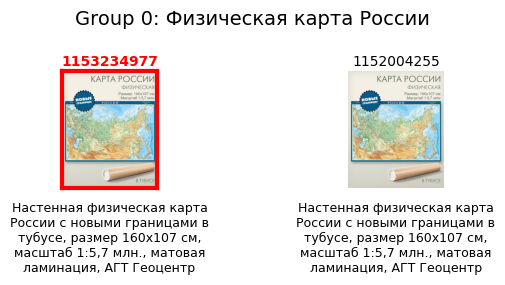

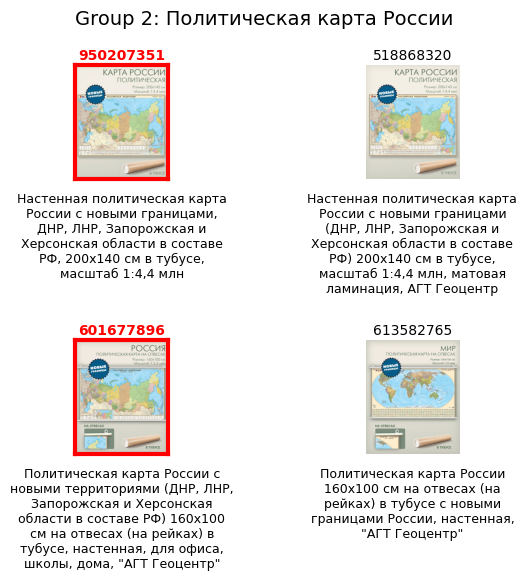

In [ ]:
from pathlib import Path
# IMAGES_DIR = Path('../competitors-xgb/data/images_OZ_geo_5500')

plot_duplicates_grids_by_group(
    merged_df,
    images_dir=IMAGES_DIR,
    image_col='image_name',
    sku_col='sku',
    dup_col='sku_duplicate',
    figsize_per_image=(3, 3),
    query_border_color='red',
    query_border_width=3,
)


## Save result

In [135]:
# --- usage ---
import datetime

dataset_path_prefix = Path('datasets') / 'OZ_geo_5500'
prompt_path_prefix = dataset_path_prefix / 'prompts' / chosen_prompt['name']
prompt_path_prefix.mkdir(parents=True, exist_ok=True)

results_prefix = (
    prompt_path_prefix / 'results' / 
    f'{response_time}_'
    f'{Path(config["model_name"]).name}_'
    f'temperature={config["temperature"]}_'
    f'seed={SEED}_'
    f'samples-per-pattern={N_SAMPLES_PER_PATTERN}_'
    f'pattern-set-id={PATTERN_SET_ID}'
)

results_prefix.mkdir(parents=True, exist_ok=True)

print(f"Saving results for prompt '{chosen_prompt['name']}'")
pd.Series(chosen_prompt['template']).to_csv(
    prompt_path_prefix / 'template.txt',
    index=False, header=False
)
pd.Series(rendered_template).to_csv(
    results_prefix / 'template_rendered.txt',
    index=False, header=False
)
full_adj_df.to_csv(
    results_prefix / 'result.csv',
    index=False
)

Saving results for prompt '5_4_duplicate_products_with_domain_knowledge'


## (optional) Add run notes

In [ ]:
run_path = '/'.join(results_prefix.parts[-3:])
print(run_path)

5_4_duplicate_products_with_domain_knowledge/results/25-04-22_16-24-43_gpt-4.1-mini_temperature=0_seed=24_samples-per-pattern=5_pattern-set-id=1


In [ ]:
# save notes per run in a separate file

runs_notes = """
example_run_path
example_notes

'5_4_duplicate_products_with_domain_knowledge/results/25-04-22_13-18-07_gpt-4.1-mini_temperature=0_seed=42_samples-per-pattern=5_pattern-set-id=0'
отлично выделяет дубликаты с temperature=0
"""

pd.Series(runs_notes).to_csv(
    dataset_path_prefix / 'runs_notes.txt',
    index=False, header=False
)


# (optional) View results directly from a file

In [136]:
# # file_path = 'datasets/OZ_geo_5500/prompts/4_0_duplicate_products/results/25-04-22_12-36-35_gpt-4.1-mini_temperature=0.3_seed=24_samples-per-pattern=5_pattern-set-id=0/result.csv'
# # file_path = 'datasets/OZ_geo_5500/prompts/5_0_duplicate_products_with_domain_knowledge/results/25-04-22_12-30-44_gpt-4.1-mini_temperature=0.3_seed=24_samples-per-pattern=5_pattern-set-id=0/result.csv'
file_path = 'datasets/OZ_geo_5500/prompts/5_4_duplicate_products_with_domain_knowledge/results/25-04-22_14-03-58_gpt-4.1-mini_temperature=0_seed=24_samples-per-pattern=5_pattern-set-id=0/result.csv'

full_adj_df_restored = pd.read_csv(file_path)
full_adj_df_restored

sku_query            sku_duplicate
0   491268805             [1176719536]
1   491270272  [553009244, 1757684675]
2   553009244  [491270272, 1757684675]
3  1176719536              [491268805]
4  1574052518                       []
5  1644084311                       []
6  1690436616                       []
7  1757684675   [491270272, 553009244]